In [21]:
#Importing basically any and all libraries I may need

import cv2
from matplotlib import pyplot as plt
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from math import sqrt
from skimage.color import rgb2gray
import glob
from skimage.io import imread
import os
import scipy
from PIL import Image, ImageDraw, ImageShow
import numpy as np
from PIL import Image, ImageDraw, ImageShow
import cv2
from pathlib import Path
import os
import PIL.ImageOps
from numpy import asarray
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import matplotlib.path as mpath
import numpy as np
from scipy import ndimage
from collections import Counter
#---------------------------------------------------------
#Libraries
import astropy
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import cv2
from PIL import Image, ImageDraw

In [15]:
import matplotlib.pyplot as plt
import astropy
from astropy.visualization import astropy_mpl_style
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits
import numpy as np
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.colors as colors

### Pretty picture

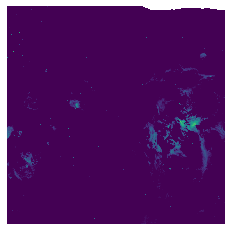

In [18]:
filename = 'thingtwo'

image_file = get_pkg_data_filename('{}.fits'.format(filename))
image_data = fits.getdata(image_file, ext=0)

#type(image_data)
#plt.imshow(image_data, aspect="auto", origin = "lower")

thresh = 10**-3.1
log_image_data = np.copy(image_data)
# Removes values below a threshold, deals with negative flux, so can plot log colour scale
log_image_data[log_image_data<thresh] = thresh
plt.imshow(log_image_data, cmap='viridis', origin='lower', norm=colors.LogNorm())
plt.axis("off")
    
plt.savefig('{}.jpg'.format(filename))

## Blob maker

In [26]:
import cv2
import numpy as np

def BlobMaker(filename):
    
    '''
    Input: filename without file extension, in string format
            - Might need to change code to include extension in filename
    '''
        
    # read image
    img = cv2.imread("{}.jpg".format(filename))
    # convert img to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # do adaptive threshold on gray image
    thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 101, 3)
    #stupid simple threshold

    # apply morphology open then close
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
    blob = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9,9))
    blob = cv2.morphologyEx(blob, cv2.MORPH_CLOSE, kernel)
    # invert blob
    blob = (255 - blob)
    # Get contours
    cnts = cv2.findContours(blob, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    big_contour = max(cnts, key=cv2.contourArea)
    # test blob size
    blob_area_thresh = 1000
    blob_area = cv2.contourArea(big_contour)
    if blob_area < blob_area_thresh:
        print("Blob Is Too Small")
    # draw contour
    result = img.copy()
    cv2.drawContours(result, [big_contour], -1, (0,0,255), 1)
    # write results to disk
    cv2.imwrite("{}_threshold.jpg".format(filename), thresh)
    cv2.imwrite("{}_blob.jpg".format(filename), blob)
    cv2.imwrite("{}_contour.jpg".format(filename), result)
    # display it
    cv2.imshow("IMAGE", img)
    cv2.imshow("THRESHOLD", thresh)
    cv2.imshow("BLOB", blob)
    cv2.imshow("RESULT", result)
    cv2.waitKey(0)

## Blob finder

In [19]:
def BlobFinder(filename):
    
    '''
    Input: filename without file extension, in string format
            - Might need to change code to include extension in filename
    '''
    
    ImageObject = imread('{}.jpg'.format(filename))
    #plt.imshow(ImageObject) #comment this later    
    image = ImageObject
    image_gray = rgb2gray(image)    
    blobs_log = blob_log(image_gray,min_sigma = 1, max_sigma=50, num_sigma=60, threshold=0.5)    
    # Compute radii in the 3rd column.
    blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)
    blobs_list = blobs_log  
    radii = []
    x_locs = [] # x coordinates of blobs
    y_locs = [] # y coordinates of blobs    
    for i in blobs_list:
        #print(i)
        radii.append(i[2])
        x_locs.append(i[1])
        y_locs.append(i[0])
    # [y,x,r]    
    plt.scatter(x_locs,y_locs,alpha = 0.8, color = 'red')
    plt.imshow(ImageObject)
    print('Number of blobs detected:  ',len(x_locs))
    print("------------- Blobs have been located -------------")
    return(ImageObject)

## Do stuff
- Pretty picture has been made (logarithm has been applied)
1. Run blob maker to make the contours and identify the different interesting regions
2. Run blob finder to identify these and plot scatter points at these locations

In [27]:
BlobMaker("thingtwo")

Number of blobs detected:   30
------------- Blobs have been located -------------


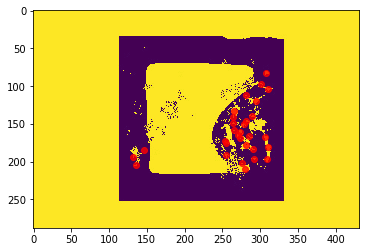

In [29]:
plot = BlobFinder("thingtwo_threshold")
im1 = plt.imshow(plot)

# Do other stuff - Stupid simple threshold

Previously applied an adaptive Gaussian threshold. Attempt to do the same

### BlobMaker2.0

In [35]:
import cv2
import numpy as np

def BlobMaker2(filename):   
    '''
    Input: filename without file extension, in string format
            - Might need to change code to include extension in filename
    '''       
    # read image
    img = cv2.imread("{}.jpg".format(filename))
    # convert img to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # do adaptive threshold on gray image
    ret, thresh = cv2.adaptiveThreshold(gray, 120, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    #stupid simple threshold

    # apply morphology open then close
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
    blob = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9,9))
    blob = cv2.morphologyEx(blob, cv2.MORPH_CLOSE, kernel)
    # invert blob
    blob = (255 - blob)
    # Get contours
    cnts = cv2.findContours(blob, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    big_contour = max(cnts, key=cv2.contourArea)
    # test blob size
    blob_area_thresh = 1000
    blob_area = cv2.contourArea(big_contour)
    if blob_area < blob_area_thresh:
        print("Blob Is Too Small")
    # draw contour
    result = img.copy()
    cv2.drawContours(result, [big_contour], -1, (0,0,255), 1)
    # write results to disk
    cv2.imwrite("{}_threshold.jpg".format(filename), thresh)
    cv2.imwrite("{}_blob.jpg".format(filename), blob)
    cv2.imwrite("{}_contour.jpg".format(filename), result)
    # display it
    cv2.imshow("IMAGE", img)
    cv2.imshow("THRESHOLD", thresh)
    cv2.imshow("BLOB", blob)
    cv2.imshow("RESULT", result)
    cv2.waitKey(0)

In [36]:
BlobMaker2(filename)

error: OpenCV(4.5.3) :-1: error: (-5:Bad argument) in function 'adaptiveThreshold'
> Overload resolution failed:
>  - adaptiveThreshold() missing required argument 'blockSize' (pos 5)
>  - adaptiveThreshold() missing required argument 'blockSize' (pos 5)
